In [1]:
import sys
sys.path.append('/gpfs/data/yuanlab/projects/VS_Proj20/env_cc7027/lib/python3.6/site-packages')

In [2]:
import torch
import torchvision
import torchio as tio
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
import nibabel as nib
from nibabel.testing import data_path
import nibabel.processing
import shutil
from pathlib import Path
import pandas as pd
import json

In [4]:
directory = './predictions_censor/'
#ground_truth_tumor_vol = pd.read_excel('../Capstone-VS/VS_censor_send.xlsx', sheet_name='Include')
#ground_truth_tumor_vol = ground_truth_tumor_vol.set_index('ID')
#ground_truth_tumor_vol['target_name'] = ground_truth_tumor_vol['target_name'].apply(lambda x: x[2:].replace(' ', '-'))

In [22]:
f = open('VS_subject.json')
subjects = json.load(f)

In [6]:
os.getcwd()

'/gpfs/data/yuanlab/projects/VS_Proj20/src/notebooks_capstone'

In [23]:
#Run on test data
directory = './predictions_train_99_epochs_prob/'
variance = {}
mean = {}
combo = {}
for subject in subjects['training']:
    prob_dir = directory + 'VS_TRAIN_prob_' + subject+ '.nii.gz'
    mask_dir = directory + 'VS_TRAIN_' + subject+ '.nii.gz'
    
    prob_img = nib.load(prob_dir)
    mask_img = nib.load(mask_dir)
    
    prob = prob_img.get_data()
    mask = mask_img.get_data()
    
    scores = (prob * mask).flatten()
    
    scores = scores[scores != 0]
    variance['VS' + subject] = np.var(scores)
    mean['VS' + subject] = np.mean(scores)
    combo['VS' + subject] = [np.var(scores), np.mean(scores)]

/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()
/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


In [46]:
#Run on val data
directory = './predictions_val_99_epochs_prob/'
variance = {}
mean = {}
combo = {}
for subject in subjects['validation']:
    prob_dir = directory + 'VS_VALIDATION_prob_' + subject+ '.nii.gz'
    mask_dir = directory + 'VS_VALIDATION_' + subject+ '.nii.gz'
    
    prob_img = nib.load(prob_dir)
    mask_img = nib.load(mask_dir)
    
    prob = prob_img.get_data()
    mask = mask_img.get_data()
    
    scores = (prob * mask).flatten()
    
    scores = scores[scores != 0] 
    variance['VS' + subject] = np.var(scores)
    mean['VS' + subject] = np.mean(scores)
    combo['VS' + subject] = [np.var(scores), np.mean(scores)]

/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  del sys.path[0]
/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


KeyboardInterrupt: 

In [47]:
#Run on test data
directory = './predictions_test_99_epochs_prob/'
variance = {}
mean = {}
combo = {}
for subject in subjects['test']:
    prob_dir = directory + 'VS_TEST_prob_' + subject+ '.nii.gz'
    mask_dir = directory + 'VS_TEST_' + subject+ '.nii.gz'
    
    prob_img = nib.load(prob_dir)
    mask_img = nib.load(mask_dir)
    
    prob = prob_img.get_data()
    mask = mask_img.get_data()
    
    scores = (prob * mask).flatten()
    
    scores = scores[scores != 0] 
    variance['VS' + subject] = np.var(scores)
    mean['VS' + subject] = np.mean(scores)
    combo['VS' + subject] = [np.var(scores), np.mean(scores)]

/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  del sys.path[0]
/gpfs/share/apps/python/gpu/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [50]:
def dice_score(y_pred, y_true):
    y_pred = y_pred.cpu().detach().numpy()
    y_true = y_true.cpu().detach().numpy()
    assert y_pred.shape == y_true.shape
    return (np.sum(y_pred[y_true == 1]) * 2.0) / (np.sum(y_pred) + np.sum(y_true))

In [9]:
#test on training set
test_result = []
for pred_path in Path('./predictions_train_99_epochs_prob').iterdir():
    print(pred_path)
    patient = 'VS' + str(pred_path).split('_')[-1].split('.')[0]
    ground_truth_path = './data/'+patient
    print(ground_truth_path)
#     try:
    if 'prob_' not in str(pred_path): 
        VSpt=tio.Subject(
            mri=tio.LabelMap(sorted(Path(ground_truth_path).glob('*image*'))[0]),
            VSmask_truth=tio.LabelMap(sorted(Path(ground_truth_path).glob('*mask_VS*'))[0]),
            VSmask_pred=tio.LabelMap(Path(pred_path)),
        )
#     except:
#         print(patient)
#         continue

        y_pred = VSpt.VSmask_pred['data'][0,:,:,:]
        y_true = VSpt.VSmask_truth['data'][0,:,:,:]/255

        unit_size = np.prod(VSpt.VSmask_truth.spacing)
        vol = (y_true.sum()*unit_size).cpu().detach().numpy() ##unit: mm^3


        score = dice_score(y_pred, y_true)
        test_result.append([patient,score,vol])

predictions_train_99_epochs_prob/VS_TRAIN_57.nii.gz
./data/VS57
predictions_train_99_epochs_prob/VS_TRAIN_335.nii.gz
./data/VS335
predictions_train_99_epochs_prob/VS_TRAIN_349.nii.gz
./data/VS349
predictions_train_99_epochs_prob/VS_TRAIN_prob_198.nii.gz
./data/VS198
predictions_train_99_epochs_prob/VS_TRAIN_prob_160.nii.gz
./data/VS160
predictions_train_99_epochs_prob/VS_TRAIN_289.nii.gz
./data/VS289
predictions_train_99_epochs_prob/VS_TRAIN_59.nii.gz
./data/VS59
predictions_train_99_epochs_prob/VS_TRAIN_202.nii.gz
./data/VS202
predictions_train_99_epochs_prob/VS_TRAIN_prob_282.nii.gz
./data/VS282
predictions_train_99_epochs_prob/VS_TRAIN_prob_58.nii.gz
./data/VS58
predictions_train_99_epochs_prob/VS_TRAIN_prob_257.nii.gz
./data/VS257
predictions_train_99_epochs_prob/VS_TRAIN_prob_63.nii.gz
./data/VS63
predictions_train_99_epochs_prob/VS_TRAIN_prob_178.nii.gz
./data/VS178
predictions_train_99_epochs_prob/VS_TRAIN_149.nii.gz
./data/VS149
predictions_train_99_epochs_prob/VS_TRAIN_238.nii

predictions_train_99_epochs_prob/VS_TRAIN_272.nii.gz
./data/VS272
predictions_train_99_epochs_prob/VS_TRAIN_331.nii.gz
./data/VS331
predictions_train_99_epochs_prob/VS_TRAIN_114.nii.gz
./data/VS114
predictions_train_99_epochs_prob/VS_TRAIN_78.nii.gz
./data/VS78
predictions_train_99_epochs_prob/VS_TRAIN_273.nii.gz
./data/VS273
predictions_train_99_epochs_prob/VS_TRAIN_152.nii.gz
./data/VS152
predictions_train_99_epochs_prob/VS_TRAIN_prob_261.nii.gz
./data/VS261
predictions_train_99_epochs_prob/VS_TRAIN_prob_57.nii.gz
./data/VS57
predictions_train_99_epochs_prob/VS_TRAIN_prob_162.nii.gz
./data/VS162
predictions_train_99_epochs_prob/VS_TRAIN_201.nii.gz
./data/VS201
predictions_train_99_epochs_prob/VS_TRAIN_20.nii.gz
./data/VS20
predictions_train_99_epochs_prob/VS_TRAIN_prob_121.nii.gz
./data/VS121
predictions_train_99_epochs_prob/VS_TRAIN_223.nii.gz
./data/VS223
predictions_train_99_epochs_prob/VS_TRAIN_67.nii.gz
./data/VS67
predictions_train_99_epochs_prob/VS_TRAIN_127.nii.gz
./data/VS12

predictions_train_99_epochs_prob/VS_TRAIN_203.nii.gz
./data/VS203
predictions_train_99_epochs_prob/VS_TRAIN_38.nii.gz
./data/VS38
predictions_train_99_epochs_prob/VS_TRAIN_297.nii.gz
./data/VS297
predictions_train_99_epochs_prob/VS_TRAIN_prob_0.nii.gz
./data/VS0
predictions_train_99_epochs_prob/VS_TRAIN_123.nii.gz
./data/VS123
predictions_train_99_epochs_prob/VS_TRAIN_prob_129.nii.gz
./data/VS129
predictions_train_99_epochs_prob/VS_TRAIN_315.nii.gz
./data/VS315
predictions_train_99_epochs_prob/VS_TRAIN_117.nii.gz
./data/VS117
predictions_train_99_epochs_prob/VS_TRAIN_293.nii.gz
./data/VS293
predictions_train_99_epochs_prob/VS_TRAIN_175.nii.gz
./data/VS175
predictions_train_99_epochs_prob/VS_TRAIN_prob_128.nii.gz
./data/VS128
predictions_train_99_epochs_prob/VS_TRAIN_prob_180.nii.gz
./data/VS180
predictions_train_99_epochs_prob/VS_TRAIN_prob_27.nii.gz
./data/VS27
predictions_train_99_epochs_prob/VS_TRAIN_prob_125.nii.gz
./data/VS125
predictions_train_99_epochs_prob/VS_TRAIN_259.nii.gz
.

In [51]:
#test on testset
test_result = []
for pred_path in Path('./predictions_test_99_epochs_prob').iterdir():
    print(pred_path)
    patient = 'VS' + str(pred_path).split('_')[-1].split('.')[0]
    ground_truth_path = './data/'+patient
    print(ground_truth_path)
#     try:
    if 'prob_' not in str(pred_path): 
        VSpt=tio.Subject(
            mri=tio.LabelMap(sorted(Path(ground_truth_path).glob('*image*'))[0]),
            VSmask_truth=tio.LabelMap(sorted(Path(ground_truth_path).glob('*mask_VS*'))[0]),
            VSmask_pred=tio.LabelMap(Path(pred_path)),
        )
#     except:
#         print(patient)
#         continue

        y_pred = VSpt.VSmask_pred['data'][0,:,:,:]
        y_true = VSpt.VSmask_truth['data'][0,:,:,:]/255

        unit_size = np.prod(VSpt.VSmask_truth.spacing)
        vol = (y_true.sum()*unit_size).cpu().detach().numpy() ##unit: mm^3

#         print(y_pred,y_true)
        score = dice_score(y_pred, y_true)
        test_result.append([patient,score,vol])

predictions_test_99_epochs_prob/VS_TEST_prob_307.nii.gz
./data/VS307
predictions_test_99_epochs_prob/VS_TEST_prob_242.nii.gz
./data/VS242
predictions_test_99_epochs_prob/VS_TEST_prob_21.nii.gz
./data/VS21
predictions_test_99_epochs_prob/VS_TEST_prob_93.nii.gz
./data/VS93
predictions_test_99_epochs_prob/VS_TEST_49.nii.gz
./data/VS49
predictions_test_99_epochs_prob/VS_TEST_255.nii.gz
./data/VS255
predictions_test_99_epochs_prob/VS_TEST_126.nii.gz
./data/VS126
predictions_test_99_epochs_prob/VS_TEST_prob_322.nii.gz
./data/VS322
predictions_test_99_epochs_prob/VS_TEST_prob_17.nii.gz
./data/VS17
predictions_test_99_epochs_prob/VS_TEST_307.nii.gz
./data/VS307
predictions_test_99_epochs_prob/VS_TEST_prob_287.nii.gz
./data/VS287
predictions_test_99_epochs_prob/VS_TEST_218.nii.gz
./data/VS218
predictions_test_99_epochs_prob/VS_TEST_275.nii.gz
./data/VS275
predictions_test_99_epochs_prob/VS_TEST_234.nii.gz
./data/VS234
predictions_test_99_epochs_prob/VS_TEST_prob_55.nii.gz
./data/VS55
prediction

In [52]:
dice_df = pd.DataFrame(test_result, columns=['patientID', 'dice_score', 'volume']).sort_values(by = 'dice_score')

In [53]:
dice_df

,patientID,dice_score,volume
7,VS91,0.682197,5766.861
6,VS234,0.730769,56.52466
13,VS283,0.736842,32.299805
22,VS322,0.746544,253.68805
30,VS93,0.770227,123.81592
26,VS100,0.772414,128.5263
23,VS221,0.801362,312.23145
37,VS1,0.814815,429.99115
8,VS53,0.828051,506.7032
41,VS7,0.844888,1155.3909


In [54]:
var_tb = pd.DataFrame.from_dict(variance, orient='index',columns = ['variance']).sort_index()
var_tb

,variance
VS1,0.023158
VS100,0.025966
VS12,0.023108
VS126,0.019205
VS130,0.023178
VS133,0.023551
VS139,0.025048
VS144,0.029128
VS145,0.023231
VS148,0.026780


In [55]:
dice_score_df = dice_df.sort_values(by = 'patientID')['dice_score']

In [56]:
dice_score_df

37    0.814815
26    0.772414
21    0.926643
2     0.944358
40    0.944435
59    0.881907
14    0.898551
31    0.878414
35    0.900144
15    0.896767
19    0.913580
12    0.894700
34    0.894866
52    0.896242
25    0.905148
20    0.938040
53    0.855633
55    0.879334
4     0.929846
23    0.801362
33    0.865704
10    0.914716
36    0.847737
6     0.730769
9     0.942566
45    0.850515
38    0.884633
27    0.946937
1     0.905535
18    0.881057
5     0.857143
48    0.858081
13    0.736842
32    0.845238
49    0.917331
42    0.874517
17    0.913043
3     0.863636
39    0.879075
28    0.880478
22    0.746544
51    0.861702
24    0.885190
57    0.896291
56    0.847909
50    0.902687
16    0.922831
47    0.905497
54    0.860613
58    0.911565
0     0.888038
43    0.867112
8     0.828051
46    0.909153
29    0.903317
41    0.844888
44    0.858437
11    0.926391
7     0.682197
30    0.770227
Name: dice_score, dtype: float64

Text(0, 0.5, 'variance')

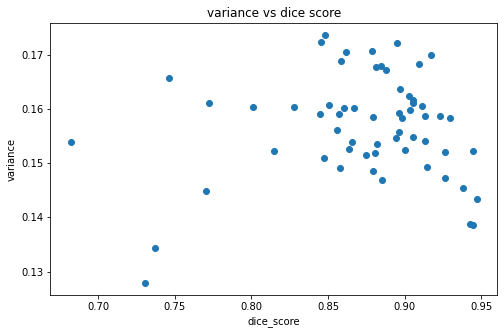

In [57]:
plt.scatter(dice_score_df,np.sqrt(var_tb))
plt.title('variance vs dice score')
plt.xlabel('dice_score')
plt.ylabel('variance')

Text(0, 0.5, 'std')

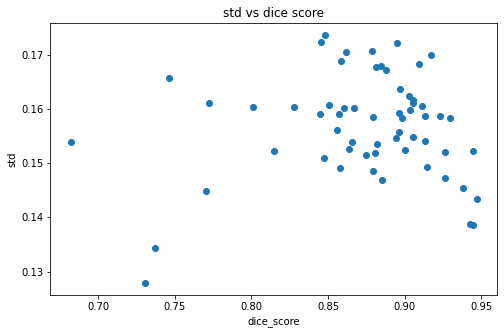

In [58]:
plt.scatter(dice_score_df,np.sqrt(var_tb))
plt.title('std vs dice score')
plt.xlabel('dice_score')
plt.ylabel('std')

In [59]:
combo_tb = pd.DataFrame.from_dict(combo, orient='index',columns = ['variance', 'mean']).sort_index()

In [60]:
combo_tb['normal_mean'] = combo_tb['mean'] / np.sqrt(combo_tb['variance'])

In [61]:
combo_tb

,variance,mean,normal_mean
VS1,0.023158,0.800409,5.259707
VS100,0.025966,0.740464,4.595214
VS12,0.023108,0.892309,5.869932
VS126,0.019205,0.916812,6.615688
VS130,0.023178,0.873100,5.734889
VS133,0.023551,0.810115,5.278914
VS139,0.025048,0.834167,5.270710
VS144,0.029128,0.835281,4.894185
VS145,0.023231,0.868426,5.697733
VS148,0.026780,0.842454,5.147988


Text(0, 0.5, 'std')

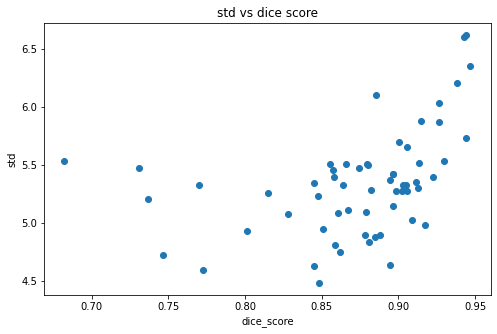

In [62]:
plt.scatter(dice_score_df,combo_tb['normal_mean'])
plt.title('std vs dice score')
plt.xlabel('dice_score')
plt.ylabel('std')

In [63]:
from scipy import stats

In [64]:
stats.pearsonr(dice_score_df, combo_tb['normal_mean'])

(0.42290710735602827, 0.0007616558575640421)

In [65]:
stats.pearsonr(dice_score_df, np.sqrt(combo_tb['variance']))

(0.09068232751219163, 0.4907805639753143)

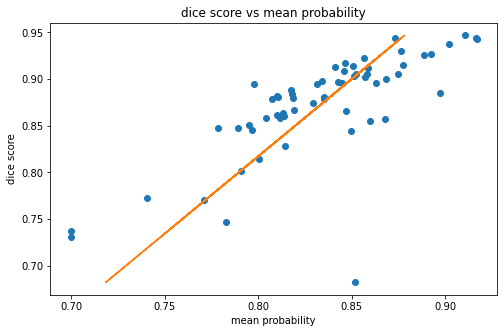

In [69]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
#test data
plt.rcParams['figure.figsize']=8,5
model = LinearRegression()
temp = dice_score_df
model.fit(temp.to_numpy().reshape(-1,1),combo_tb['mean'].to_numpy().reshape(-1,1))
predictions = model.predict(temp.to_numpy().reshape(-1,1))

model.fit(temp.to_numpy().reshape(-1,1),combo_tb['mean'].to_numpy().reshape(-1,1))
predictions = model.predict(temp.to_numpy().reshape(-1,1))

plt.plot(combo_tb['mean'],dice_score_df,'o')
# change here
plt.plot(predictions,temp,'-')
plt.ylabel('dice score')
plt.xlabel('mean probability')
plt.title('dice score vs mean probability')
plt.show()

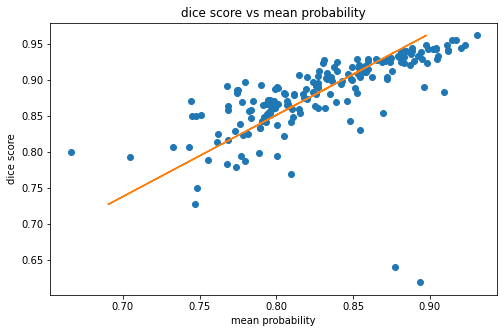

In [45]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
# 343 35
plt.rcParams['figure.figsize']=8,5
model = LinearRegression()
temp = dice_score_df[dice_score_df > 0.7]
model.fit(temp.to_numpy().reshape(-1,1),combo_tb['mean'].drop(index = ['VS343','VS35']).to_numpy().reshape(-1,1))
predictions = model.predict(temp.to_numpy().reshape(-1,1))

model.fit(temp.to_numpy().reshape(-1,1),combo_tb['mean'].drop(index = ['VS343','VS35']).to_numpy().reshape(-1,1))
predictions = model.predict(temp.to_numpy().reshape(-1,1))

plt.plot(combo_tb['mean'],dice_score_df,'o')
# change here
plt.plot(predictions,temp,'-')
plt.ylabel('dice score')
plt.xlabel('mean probability')
plt.title('dice score vs mean probability')
plt.show()

In [81]:
def image_range(orientation,sample):
    #orientation can only be axslice,corslice,sagslice
    #data format VSpt['VSmask']
    checker = True
    if orientation == 'axslice':
        for i in range(sample.shape[3]):
            if sample.data[0,:,:,i].sum() != 0:
                if checker:
                    start = i
                checker = False
            if (sample.data[0,:,:,i].sum() == 0) and (not checker) and (i > start) :
                end = i-1
                break
        return start,end  
    if orientation == 'corslice':
        for i in range(sample.shape[2]):
            if sample.data[0,:,i,:].sum() != 0:
                if checker:
                    start = i
                checker = False
            if (sample.data[0,:,i,:].sum() == 0) and (not checker) and (i > start) :
                end = i-1
                break
        return start,end  
    if orientation == 'sagslice':
        for i in range(sample.shape[1]):
            if sample.data[0,i,:,:].sum() != 0:
                if checker:
                    start = i
                checker = False
            if (sample.data[0,i,:,:].sum() == 0) and (not checker) and (i > start) :
                end = i-1
                break
        return start,end  
image_range('axslice',VSpt['VSmask_truth'])

(47, 73)

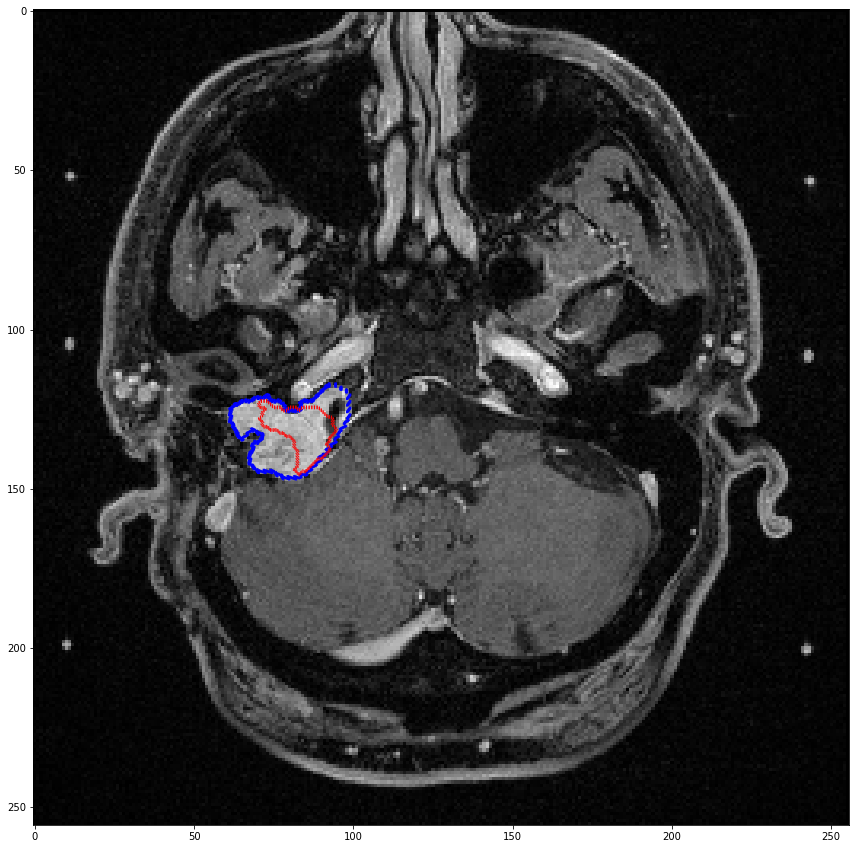

In [83]:
plt.rcParams['figure.figsize']=25,15
subjectnumber='VS43'
VSpt=tio.Subject(
    mri=tio.LabelMap(sorted(Path('./data_processed_censor/'+subjectnumber).glob('*image*'))[0]),
    VSmask_truth=tio.LabelMap(sorted(Path('./data_processed_censor/'+subjectnumber).glob('*mask_VS*'))[0]),
    VSmask_pred=tio.LabelMap(Path('./predictions_censor/VS_TEST_'+subjectnumber[2:]+'.nii.gz')),
)
axslice=60
img1=plt.imshow(np.rot90(VSpt['mri']['data'][0,:,:,axslice],k=3),cmap='gray')
img2=plt.contour(np.rot90(VSpt['VSmask_truth']['data'][0,:,:,axslice],k=3),colors='blue',linewidths=2.5,linestyles='dotted')
img3=plt.contour(np.rot90(VSpt['VSmask_pred']['data'][0,:,:,axslice],k=3),colors='red',linewidths=1,linestyles='dotted')
plt.show()

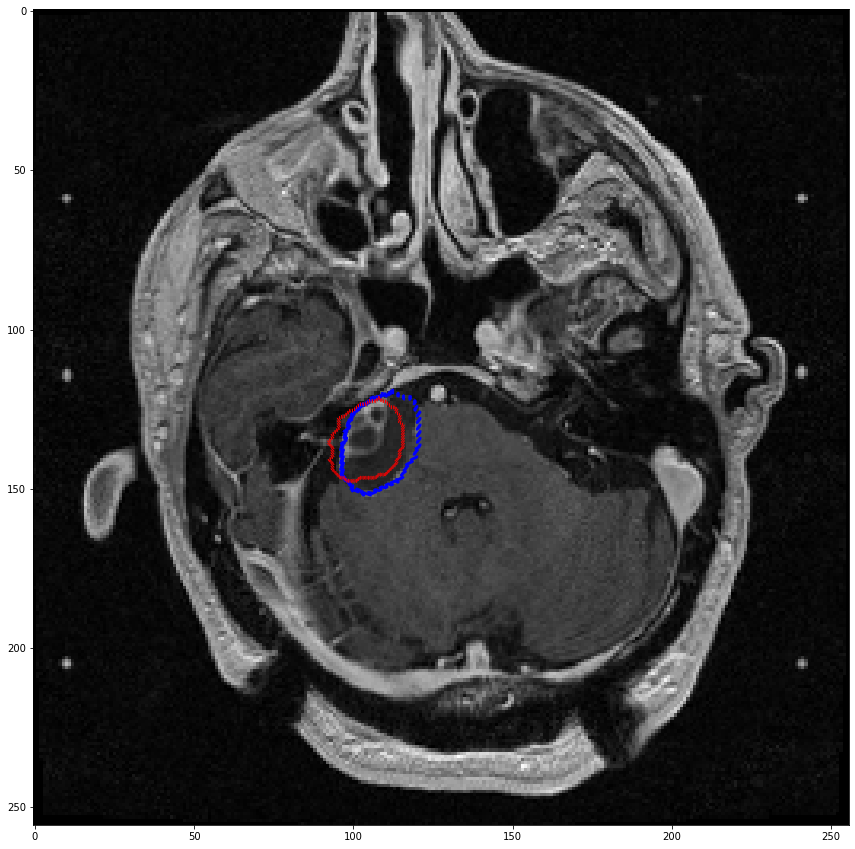

In [27]:
plt.rcParams['figure.figsize']=25,15
subjectnumber='VS35'
VSpt=tio.Subject(
    mri=tio.LabelMap(sorted(Path('./data/'+subjectnumber).glob('*image*'))[0]),
    VSmask_truth=tio.LabelMap(sorted(Path('./data/'+subjectnumber).glob('*mask_VS*'))[0]),
    VSmask_pred=tio.LabelMap(Path('./predictions_train_99_epochs_prob/VS_TRAIN_'+subjectnumber[2:]+'.nii.gz')),
)
axslice=70
img1=plt.imshow(np.rot90(VSpt['mri']['data'][0,:,:,axslice],k=3),cmap='gray')
img2=plt.contour(np.rot90(VSpt['VSmask_truth']['data'][0,:,:,axslice],k=3),colors='blue',linewidths=2.5,linestyles='dotted')
img3=plt.contour(np.rot90(VSpt['VSmask_pred']['data'][0,:,:,axslice],k=3),colors='red',linewidths=1,linestyles='dotted')
plt.show()

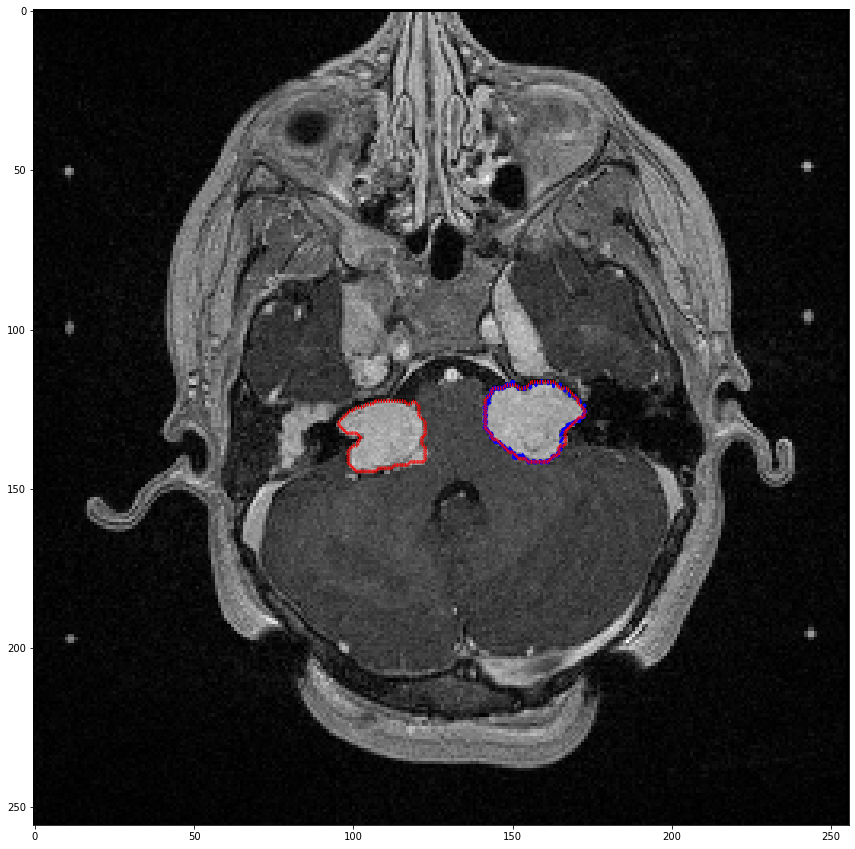

In [28]:
plt.rcParams['figure.figsize']=25,15
subjectnumber='VS343'
VSpt=tio.Subject(
    mri=tio.LabelMap(sorted(Path('./data/'+subjectnumber).glob('*image*'))[0]),
    VSmask_truth=tio.LabelMap(sorted(Path('./data/'+subjectnumber).glob('*mask_VS*'))[0]),
    VSmask_pred=tio.LabelMap(Path('./predictions_train_99_epochs_prob/VS_TRAIN_'+subjectnumber[2:]+'.nii.gz')),
)
axslice=70
img1=plt.imshow(np.rot90(VSpt['mri']['data'][0,:,:,axslice],k=3),cmap='gray')
img2=plt.contour(np.rot90(VSpt['VSmask_truth']['data'][0,:,:,axslice],k=3),colors='blue',linewidths=2.5,linestyles='dotted')
img3=plt.contour(np.rot90(VSpt['VSmask_pred']['data'][0,:,:,axslice],k=3),colors='red',linewidths=1,linestyles='dotted')
plt.show()

In [69]:
dice_df.loc[73]

patientID         VS35
dice_score    0.640973
volume        6235.208
Name: 73, dtype: object

In [24]:
dice_df.loc[121]

patientID        VS343
dice_score    0.618985
volume        4333.557
Name: 121, dtype: object

In [37]:
dice_score[dice_score < 0.7]

121    0.618985
73     0.640973
Name: dice_score, dtype: float64

In [34]:
stats.pearsonr(dice_score, combo_tb['mean'])

(0.6383197946515002, 1.2149623404891527e-21)

$\text{confidence score} = \frac{1}{n} \sum_{i=1}^{n} prob_i$, where $prob_i$ > threshold